# **Medicine Recommender System**

In an era where personalized medicine and preventive health care are becoming increasingly significant, there is a growing demand for innovative solutions that empower individuals to manage their health effectively. Traditional medical consultations and health management strategies can be costly and time-consuming, which underscores the need for accessible, personalized health management tools. This research proposes the development of a Medicine Recommender System designed to provide users with tailored recommendations based on their symptoms.

## **Problem Statement**

Accurate health management requires timely and relevant information, which can be challenging to obtain through conventional means. The primary issues faced include:

- Lack of Personalized Guidance: Many individuals struggle to find specific dietary, workout, and medication recommendations suited to their unique health conditions and symptoms.

- Limited Access to Early Diagnosis: Early detection of diseases often relies on medical consultations, which may not always be readily available.

- Difficulty in Integrating Health Recommendations: Users need a cohesive system that integrates dietary, workout, and medication advice with disease prediction.

## **Objectives**

This research aims to address these issues by developing a comprehensive Medicine Recommender System with the following objectives:

- Provide Personalized Diet Recommendations: Utilize symptom data to suggest dietary changes that can alleviate or manage health issues.

- Offer Tailored Workout Plans: Generate workout routines that cater to the user’s health condition and fitness goals.

- Recommend Appropriate Medications: Suggest medications based on the user’s symptoms to aid in symptom relief or management.

- Predict Potential Diseases: Analyze symptom data to predict possible diseases, enabling early intervention and preventive care.

## **Metrics of Success**

The effectiveness of the Medicine Recommender System will be evaluated using the following metrics:

- Accuracy: Precision of recommendations and predictions based on expert guidelines and real-world outcomes.

- User Satisfaction: Feedback and engagement levels from users regarding the relevance and usefulness of the recommendations.

- System Performance: Response time and scalability of the system in handling user queries and data.

- Health Outcomes: Improvement in users' health status and reduction in symptom severity.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data/Training.csv")
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check for missing values
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

# Check if there are missing values
if missing_columns.empty:
    print("There are no missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns)


There are no missing values in the dataset.


In [9]:
# # Check for duplicate rows
# duplicates = data.duplicated()

# # Print the number of duplicate rows
# print(f"Number of duplicate rows: {duplicates.sum()}")

# # Display duplicate rows if any
# if duplicates.sum() > 0:
#     print("Duplicate rows:")
#     print(data[duplicates])
# else:
#     print("No duplicate rows found.")


In [11]:
data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

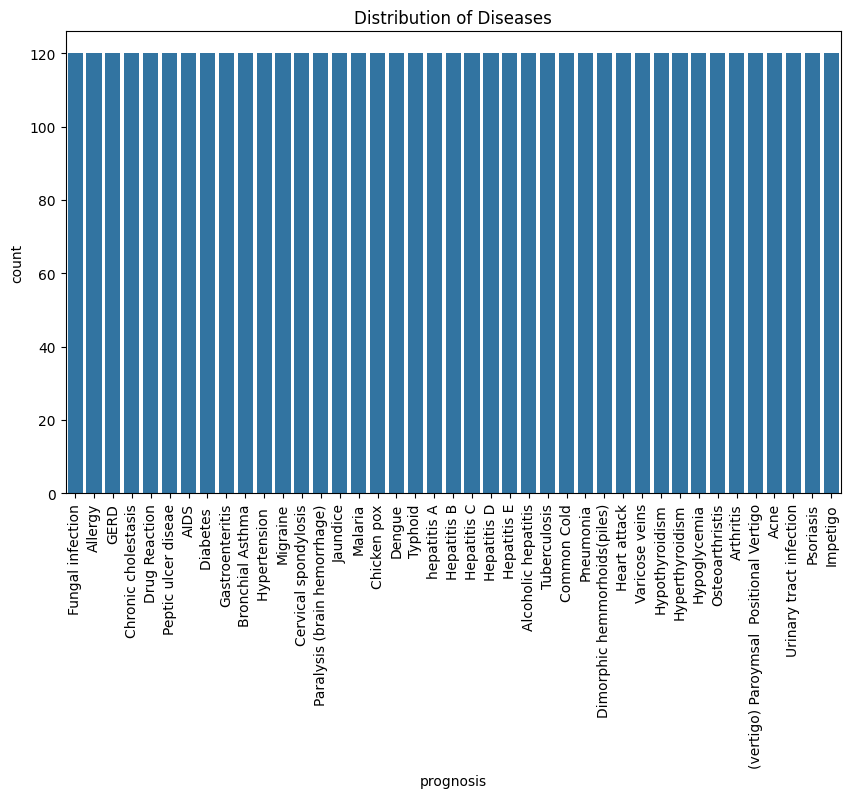

In [10]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='prognosis')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('Distribution of Diseases')
plt.show()


In [13]:
# Count the number of features (excluding the target variable)
num_features = len(features)
print(f"Number of features: {num_features}")


Number of features: 132


In [14]:
import plotly.express as px

# Function to create interactive histograms using Plotly
def plot_interactive_histograms(data, features):
    for feature in features:
        fig = px.histogram(data, x=feature, nbins=30, title=f'Distribution of {feature}')
        fig.show()

# Plot interactive histograms for selected features
plot_interactive_histograms(data, features[:10])  # Adjust as needed


ModuleNotFoundError: No module named 'plotly'

In [12]:
# Plot histograms for each feature
features = data.columns[:-1]  # Exclude the target variable
data[features].hist(figsize=(15, 12), bins=30, layout=(5, 6))
plt.suptitle('Distribution of Features')
plt.show()


ValueError: Layout of 5x6 must be larger than required size 132

<Figure size 1500x1200 with 0 Axes>